# Hero Figures

The Science of Startups: The Impact of Founder Personalities on Company Success #
2024-01-16, Xian Gong
Output: 
 - Employees vs Entrepreneurs Random Forest model confusion matrix (Fig 1A)
 - Employees vs Entrepreneurs Distribution of big 5 facets (Figure 1B)
 - t-SNE 2D plot with six clusters (Figure 1C)
 - Dendrogram heat map of facets per cluster (Figure 1D)

In [1]:
import pandas as pd
import numpy as np

In [2]:
import matplotlib.pyplot as plt
import matplotlib.patheffects as PathEffects
from matplotlib.collections import PolyCollection
from matplotlib.colors import to_rgb
import seaborn as sns

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedKFold, GridSearchCV, RandomizedSearchCV, cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import fbeta_score
from sklearn.metrics import log_loss
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix

In [4]:
import plotly
import plotly.express as px
import plotly.io as pio
import plotly.graph_objects as go

In [5]:
from sklearn.preprocessing import scale
import scipy
from random import random
import pandas.testing as tm

In [6]:
from pyclustertend import hopkins

In [7]:
import scipy.cluster.hierarchy as sch
from sklearn.manifold import TSNE
import time

In [8]:
from sklearn import datasets
from palmerpenguins import load_penguins

from sklearn.metrics import davies_bouldin_score
from sklearn.metrics import silhouette_score
from sklearn.metrics import calinski_harabasz_score
from validclust import dunn

from sklearn.metrics import pairwise_distances

from sklearn.cluster import AgglomerativeClustering
import statsmodels.api as sm

In [9]:
# Figure Quality
%matplotlib inline
plt.rcParams['figure.dpi'] = 300

# Main

## Figure 1A (Employees vs Entrepreneurs Random Forest model confusion matrix)

It takes forever to run the code so I take smaller samples here.

In [10]:
# Load the data
df_input = pd.read_csv('Entrepreneurs_and_Employee_Scores_Anon.csv')
df_input = df_input.set_index('User')

In [11]:
df_input = df_input.sample(500)

In [12]:
# Load the data
#df_input = pd.read_csv('11085_Entrepreneurs_and_Employee_Percentile_Scores.csv')
#df_input = df_input.set_index('User')

# Train Test Split
X_train, X_test, y_train, y_test = train_test_split(df_input.iloc[:,:-1], df_input.iloc[:,[-1]], test_size=0.3, random_state=42)

# Tuning hyperparameters of SVM
# List of C values
C_range = np.logspace(-1, 1, 3)
print(f'The list of values for C are {C_range}')
# List of gamma values
gamma_range = np.logspace(-1, 1, 3)
print(f'The list of values for gamma are {gamma_range}')

The list of values for C are [ 0.1  1.  10. ]
The list of values for gamma are [ 0.1  1.  10. ]


## Comment

The following code takes very long to run:

In [13]:
# SVM Classifier
# Define the search space
param_grid = { 
    # Regularization parameter.
    "C": C_range,
    # Kernel type
    "kernel": ['rbf', 'poly'],
    # Gamma is the Kernel coefficient for ‘rbf’, ‘poly’ and ‘sigmoid’.
    "gamma": gamma_range.tolist()+['scale', 'auto']
    }
# Set up score
scoring = ['roc_auc']
# Set up the k-fold cross-validation
kfold = StratifiedKFold(n_splits=2, shuffle=True, random_state=0)

svc = SVC(probability=True)
# Define grid search
grid_search = GridSearchCV(estimator=svc, 
                           param_grid=param_grid, 
                           scoring=scoring, 
                           refit='roc_auc', 
                           n_jobs=-1, 
                           cv=kfold, 
                           verbose=0)
# Fit grid search
grid_result = grid_search.fit(X_train, y_train)


/Users/fabian2/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1229: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/fabian2/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1229: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/fabian2/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1229: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/fabian2/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1229: DataConversionWarning: A column-vector y was passed when a 1d array w

KeyboardInterrupt: 

In [ ]:
# Model Performance
print(f'The best accuracy score for the training dataset is {grid_result.best_score_:.4f}')
print(f'The best hyperparameters are {grid_result.best_params_}')
print(f'The accuracy score for the testing dataset is {grid_search.score(X_test, y_test):.4f}')

# Test set Performance
svm_best_model = grid_result.best_estimator_

y_pred_svm = svm_best_model.predict(X_test)
y_pred_log_proba_svm = svm_best_model.predict_log_proba(X_test)
y_pred_proba_svm = svm_best_model.predict_proba(X_test)

accuracy_svm = accuracy_score(y_test, y_pred_svm)
f1_svm = f1_score(y_test, y_pred_svm, average='weighted')
auc_svm = roc_auc_score(y_test, y_pred_proba_svm[:, 1])

CM_svm = confusion_matrix(y_test,y_pred_svm)
TN_svm = CM_svm[0][0]
FN_svm = CM_svm[1][0] 
TP_svm = CM_svm[1][1]
FP_svm = CM_svm[0][1]

specificity_svm = round(TN_svm / (TN_svm+FP_svm),4 ) 
ppv_svm = round(TP_svm / (TP_svm+FP_svm),4 )

print ("Accuracy score: {0}".format(accuracy_svm))
print ("F1 score: {0}".format(f1_svm))
print ("Specificity: {0}".format(specificity_svm))
print ("Positive Predictive Value: {0}".format(ppv_svm))
print ("AUC score: {0}".format(auc_svm))



In [ ]:
# Figure 1A
data = (CM_svm/CM_svm.sum(axis = 1)).tolist()
fig = px.imshow(data,
                labels=dict(x="<b>Predicted Label</b>", y="<b>True Label</b>", color="Percent", fontsize = 14),
                x=['Employee', 'Entrepreneur'],
                y=['Employee', 'Entrepreneur'], 
#                 color_continuous_scale = px.colors.sequential.Blugrn, 
                color_continuous_scale = px.colors.sequential.Greens, 
                template = 'simple_white', 
                text_auto='.2f')
fig.update_xaxes(side="top")

fig.update_coloraxes(colorbar_thickness = 30, 
                     colorbar_tickfont = dict(size = 20),
                     colorbar_len = 0.6, 
                     colorbar_ticklabelposition = 'outside top')

fig.update_layout(margin = dict(t=200,r=200,b=200,l=200),
    xaxis = dict(linecolor = 'white'),
    yaxis = dict(linecolor = 'white'),
    showlegend = False,
    width = 700, height = 700,
    autosize = False )

fig.update_layout(
    font=dict(
        size=14,  # Set the font size here
    )
)

fig.update_layout(
    margin=dict(r=0, b=0, t = 0, l=0,pad=20)
)

# fig.update_layout(

# #     xaxis=dict(gridcolor='lightgrey'),
#     margin=dict(r=2, b=50, pad=10)
# )


#x axis
# fig.update_xaxes(visible=False)

#y axis    
# fig.update_yaxes(visible=False)
fig.show()
# fig.write_image("outputFiles/Figure_2a.pdf")

## Figure 1B (Employees vs Entrepreneurs Distribution of big 5 facets)

In [13]:
# Load Dataset
df_facet_compare = pd.read_csv('Entrepreneurs_and_Employee_Scores_Anon.csv')
df_facet_compare = df_facet_compare.set_index('User')


df_compaer_graph = pd.DataFrame(df_facet_compare.set_index('Target').stack()).reset_index()
df_compaer_graph.columns = ['Target','Personality','Value']
df_compaer_graph['Personality'] = df_compaer_graph['Personality'].apply(lambda x: x.replace('_facet_',' (').replace('_percentile',')').replace('Emotional range','Emotional Stability').replace('_','-'))

# Manipulate the dataset for the figrue
df_sig_comper = df_compaer_graph[df_compaer_graph['Personality'].str.contains('adventurousness|modesty|activity-level|anxiety|immoderation|trust')]
df_sig_comper = pd.concat([df_sig_comper[df_sig_comper['Personality'] == 'Openness (adventurousness)'],
                           df_sig_comper[df_sig_comper['Personality'] == 'Agreeableness (modesty)'],
                           df_sig_comper[df_sig_comper['Personality'] == 'Extraversion (activity-level)'],
                           df_sig_comper[df_sig_comper['Personality'] == 'Emotional Stability (anxiety)'],
                           df_sig_comper[df_sig_comper['Personality'] == 'Emotional Stability (immoderation)'],
                           df_sig_comper[df_sig_comper['Personality'] == 'Agreeableness (trust)']])


In [93]:
# Figure 1B
sns.set(font_scale = 4)
sns.set_style("whitegrid", {'legend.frameon':False})
plt.figure(figsize=(20,35))

           
ax = sns.violinplot(x="Value", y="Personality", hue="Target", 
                    data=df_sig_comper, 
                    palette=['.4', '.8'],
                    split=True, linewidth = 2)

colors = [sns.color_palette("Paired")[1], sns.color_palette("Paired")[0],
          sns.color_palette("Greens")[4], sns.color_palette("Greens")[2],
          sns.color_palette("Paired")[7], sns.color_palette("Paired")[6],
          sns.color_palette("Paired")[9], sns.color_palette("Paired")[8],
          sns.color_palette("Paired")[9], sns.color_palette("Paired")[8],
          sns.color_palette("Greens")[4], sns.color_palette("Greens")[2]]

for ind, violin in enumerate(ax.findobj(PolyCollection)):
    rgb = to_rgb(colors[ind])
    violin.set_facecolor(rgb)

ax.tick_params(axis='x', colors='black')
ax.tick_params(axis='y', colors='black') 
sns.set(font_scale = 4)
plt.setp(ax.collections, alpha=.6)
ax.set(xlabel="Percentile Score of Personality Facet")
ax.set(ylabel=None)
ax.xaxis.set_label_coords(.5, -.06)

ax.legend(loc='center left', bbox_to_anchor=(1, 0.5), facecolor = 'white')
sns.despine(left=True,bottom = True)
plt.margins(x=0, y=0)

fig = ax.get_figure()


## Figure 1C (t-SNE 2D plot with six clusters)

In [14]:
df_facet_matrix = pd.read_excel('Founders_Cofounders_Twitter_Personality_Matrix_Anon_diff.xlsx')

In [15]:
df_facet_matrix_raw = df_facet_matrix

In [96]:
df_facet_matrix = df_facet_matrix_raw

In [97]:
# Load and Clean Dataset
#df_facet_matrix = pd.read_excel('Founders and Cofounders with Twitter (40k) - Personality Matrix.xlsx')
df_facet_matrix_filter = df_facet_matrix.loc[:,df_facet_matrix.columns.str.contains('facet') & df_facet_matrix.columns.str.contains('raw_score') | df_facet_matrix.columns.str.contains('User')]
print (df_facet_matrix_filter.shape)
df_facet_matrix_filter = df_facet_matrix_filter.drop_duplicates('User')
print (df_facet_matrix_filter.shape)
df_facet_matrix_filter = df_facet_matrix_filter.set_index('User')
print (df_facet_matrix_filter.shape)
df_facet_matrix_filter = df_facet_matrix_filter[~df_facet_matrix_filter['Openness_facet_adventurousness_raw_score'].isna()]
print (df_facet_matrix_filter.shape)


(42266, 31)
(40580, 31)
(40580, 30)
(32732, 30)


In [98]:
df_facet_matrix_filter = df_facet_matrix_filter.sample(1000)

In [ ]:
# Apply t-SNE
RS = 123
# time_start = time.time()
# df_input = df_inno_eco_matrix
tsne = TSNE(random_state=RS).fit_transform(df_facet_matrix_filter)
hopkins(tsne,tsne.shape[0])

## Comment

The following code takes very long to run:

In [ ]:
# Dendrogram
sns.set(font_scale = 1)
dendrogram = sch.dendrogram(sch.linkage(tsne, method  = "ward"))
plt.title('Dendrogram')
plt.xlabel('Founders')
plt.ylabel('Euclidean distances')
plt.show()

## Comment

The following code takes very long to run:

In [ ]:
# Number of Cluster Selection

num_cluster_range = list(range(2,31))

# Davies Bouldin Index - The smaller the better
db_score_list = []
for i in num_cluster_range:
    hc_test = AgglomerativeClustering(n_clusters = i, metric = 'euclidean', linkage ='ward')
    y_hc_test = hc_test.fit_predict(tsne)
    db_score_list.append(davies_bouldin_score(tsne, y_hc_test))

# Silhouette Coefficient - The larger the better
sil_score_list = []
for i in num_cluster_range:
    hc_test = AgglomerativeClustering(n_clusters = i, metric = 'euclidean', linkage ='ward')
    y_hc_test = hc_test.fit_predict(tsne)
    sil_score_list.append(silhouette_score(tsne, y_hc_test))

# Calinski Harabas Index - The larger the better
ch_score_list = []
for i in num_cluster_range:
    hc_test = AgglomerativeClustering(n_clusters = i, metric = 'euclidean', linkage ='ward')
    y_hc_test = hc_test.fit_predict(tsne)
    ch_score_list.append(calinski_harabasz_score(tsne, y_hc_test))

# Dunn Index - The larger the better
dunn_score_list = []
for i in num_cluster_range:
    hc_test = AgglomerativeClustering(n_clusters = i, metric = 'euclidean', linkage ='ward')
    y_hc_test = hc_test.fit_predict(tsne)
    dist = pairwise_distances(tsne)
    dunn_score_list.append(dunn(dist, y_hc_test))



In [ ]:
pio.templates.default = "plotly_white"
# Create traces
fig = go.Figure()
fig.add_vline(x=6, line_width=1, line_dash="dash", line_color="grey")
fig.add_trace(go.Scatter(x=num_cluster_range, y=scale(db_score_list),
                         mode='lines', name='Davies Bouldin Index', 
                         line=dict(color='#d62728', width=2.5)))
fig.add_trace(go.Scatter(x=num_cluster_range, y=scale(sil_score_list),
                         mode='lines', name='Silhouette Coefficient',
                         line=dict(color='#1f77b4', width=2.5, dash='dash')))
fig.add_trace(go.Scatter(x=num_cluster_range, y=scale(ch_score_list), 
                         mode='lines', name='Calinski Harabas Index',
                         line=dict(color='#ff7f0e', width=2.5, dash='dashdot')))
fig.add_trace(go.Scatter(x=num_cluster_range, y=scale(dunn_score_list),
                         mode='lines', name='Dunn Index',
                         line=dict(color='#9467bd', width=2.5, dash='dot')))
fig.update_layout(
#     title='Clustering Quality VS Number of Clusters',
                  xaxis_title='Number of Clusters',
                  yaxis_title='Scaled Scores')
fig.show()

In [ ]:
# Hierarchical Clustering
hc = AgglomerativeClustering(n_clusters = 6, metric = 'euclidean', linkage ='ward')

y_hc=hc.fit_predict(tsne)
df_6clusters = df_facet_matrix_filter.copy()
df_6clusters['Hierarchical_label'] = y_hc


In [ ]:
# Figure 1C
clustering_colors = ['rgb(230,245,152)','rgb(252,141,89)','rgb(50,136,189)','rgb(213,62,79)','rgb(153,213,148)','rgb(254,224,139)']

df_clustering = pd.concat([df_6clusters.reset_index(), pd.DataFrame(tsne, columns = ['x','y'])], axis = 1)
df_clustering['Hierarchical_label'] = df_clustering['Hierarchical_label'].apply(lambda x: str(x).replace('1','6').replace('2','7').replace('3','8').replace('4','9').replace('5','-1').replace('9','1').replace('-1','2').replace('6','3').replace('8','4').replace('7','5'))
df_clustering['Hierarchical_label'] = df_clustering['Hierarchical_label'].astype(int)
df_clustering = df_clustering[['x','y','Hierarchical_label']].copy()
df_clustering['Hierarchical_label'] = df_clustering['Hierarchical_label'].apply(lambda x: str(x).replace('0','Accomplisher').replace('1','Engineer').replace('2','Leader').replace('3','Developer').replace('4','Operator').replace('5','Fighter'))
df_clustering = df_clustering.sort_values('Hierarchical_label')
df_textbox = df_clustering.groupby('Hierarchical_label')[['x','y']].mean().reset_index()

fig = px.scatter(df_clustering, x="x", y="y", color="Hierarchical_label",
                 hover_data=['Hierarchical_label'], template = "plotly_white",
                 color_discrete_sequence=clustering_colors, 
#                  color_discrete_sequence=px.colors.qualitative.Prism, 
                 opacity = 0.2, width=1000, height=800)
fig.update_layout({
    'plot_bgcolor': 'rgba(0,0,0,0)',
    'paper_bgcolor': 'rgba(0,0,0,0)'
})

fig.update_layout(yaxis=dict(title=''),
                  xaxis=dict(title=''))

fig.update_layout(showlegend=False)

fig.update_xaxes(showline = True, linecolor = 'grey', linewidth = 1, row = 1, col = 1, mirror = True)
fig.update_yaxes(showline = True, linecolor = 'grey', linewidth = 1, row = 1, col = 1, mirror = True)
fig.update_xaxes(title="t-SNE dimension 1", title_font=dict(size=16))
fig.update_yaxes(title="t-SNE dimension 2", title_font=dict(size=16))


for index, text, x,y in df_textbox.itertuples(index=True):
    if (text == 'Accomplisher') or (text == 'Leader'):
        text_edit = '<b>' + text + '</b>'
    elif (text == 'Operator') or (text == 'Developer') or (text == 'Fighter'):
        text_edit = '<b>' + text + '</b>'
    else:
        text_edit = '<b>' + text + '</b>'
    fig.add_annotation(
        x=x, y=y,
        text='                       <br>                       ',
        showarrow=False,
        xref="x",
        yref="y",
        font=dict(
            size=14,
            color='black'
            ),
        align="center",
        bordercolor=clustering_colors[index],
#         bordercolor=px.colors.qualitative.Prism[index],
        borderwidth=0,
        borderpad=8,
#         bgcolor=clustering_colors[index],
#         bgcolor=px.colors.qualitative.Prism[index],
        opacity=0.4
    )
    fig.add_annotation(
        x=x, y=y,
        text=text_edit,
        showarrow=False,
        xref="x",
        yref="y",
        font=dict(
            size=18,
            color='black'
            ),
        align="center",
        opacity=1
    )    
    
fig.update_layout(

#     xaxis=dict(gridcolor='lightgrey'),
    margin=dict(r=50, b=0, t = 50, l=0,pad=20)
)
fig.show()
# fig.write_image("outputFiles/Figure_2c.svg")

## Figure 1D (Dendrogram heat map of facets per cluster)

In [ ]:
df_facet_percentile_compare = df_facet_matrix_raw

In [ ]:
# Load and Clean Dataset
#df_facet_percentile_compare = pd.read_excel('Founders and Cofounders with Twitter (40k) - Personality Matrix.xlsx')
df_facet_percentile_compare_filter = df_facet_percentile_compare.loc[:,df_facet_percentile_compare.columns.str.contains('facet') & df_facet_percentile_compare.columns.str.contains('percentile') | df_facet_percentile_compare.columns.str.contains('User')]
print (df_facet_percentile_compare_filter.shape)
df_facet_percentile_compare_filter = df_facet_percentile_compare_filter.drop_duplicates('User')
print (df_facet_percentile_compare_filter.shape)
df_facet_percentile_compare_filter = df_facet_percentile_compare_filter.set_index('User')
print (df_facet_percentile_compare_filter.shape)
df_facet_percentile_compare_filter = df_facet_percentile_compare_filter[~df_facet_percentile_compare_filter['Openness_facet_adventurousness_percentile'].isna()]
print (df_facet_percentile_compare_filter.shape)

df_clustering = pd.concat([df_6clusters.reset_index(), pd.DataFrame(tsne, columns = ['x','y'])], axis = 1)
df_clustering['Hierarchical_label'] = df_clustering['Hierarchical_label'].apply(lambda x: str(x).replace('1','6').replace('2','7').replace('3','8').replace('4','9').replace('5','-1').replace('9','1').replace('-1','2').replace('6','3').replace('8','4').replace('7','5'))
df_clustering['Hierarchical_label'] = df_clustering['Hierarchical_label'].astype(int)
df_clustering = df_clustering[['User','Hierarchical_label']].copy()
df_clustering['Hierarchical_label'] = df_clustering['Hierarchical_label'].apply(lambda x: str(x).replace('0','Accomplisher').replace('1','Engineer').replace('2','Leader').replace('3','Developer').replace('4','Operator').replace('5','Fighter'))

df_facet_percentile_compare_filter = df_clustering.merge(df_facet_percentile_compare_filter, how = 'left', left_on = 'User', right_on = 'User')
df_facet_percentile_compare_filter = df_facet_percentile_compare_filter.set_index('User')
df_heatmap_median = df_facet_percentile_compare_filter.groupby('Hierarchical_label').median().T
df_heatmap_median.index = ['{0} ({1})'.format(i.replace('_percentile','').replace('_facet','').replace('Emotional range','Emotional Stability').split('_')[0],'-'.join(i.replace('_percentile','').replace('_facet','').replace('Emotional range','Emotional Stability').split('_')[1:])) for i in df_heatmap_median.index.tolist()]

In [ ]:
# Figure 1D
im = sns.clustermap(df_heatmap_median, cmap='Greens', linewidth = 1)
ax = im.ax_heatmap
ax.set_xlabel("")
labels = ['Engineer','Fighter','Developer','Operator','Accomplisher','Leader']
ax.set_xticklabels(labels, rotation=90, ha='center')
plt.show()
fig = ax.get_figure()



# Supplement

## Extended Data Figure 4 (Cohen’s D)

In [16]:
# Extended Data Figure 4
# Load Dataset
df_facet_compare_entrepreneur = pd.read_csv('Entrepreneurs_and_Employee_Scores_Anon.csv')
df_facet_compare_entrepreneur = df_facet_compare_entrepreneur.set_index('User')

#measure cohens d function
def cohen_d(x,y):
    nx = len(x)
    ny = len(y)
    dof = nx + ny - 2
    return (np.mean(x) - np.mean(y)) / np.sqrt(((nx-1)*np.std(x, ddof=1) ** 2 + (ny-1)*np.std(y, ddof=1) ** 2) / dof)

# Organize the results
facet_test_list = []
for facet in df_facet_compare_entrepreneur.columns.tolist()[:30]:
    row_dict = {}
    boss_sample = df_facet_compare_entrepreneur[df_facet_compare_entrepreneur['Target'] == 'Entrepreneur'][facet].tolist()
    employee_sample = df_facet_compare_entrepreneur[df_facet_compare_entrepreneur['Target'] == 'Employee'][facet].tolist()
    row_dict['Big 5 Personality Facets'] = facet
    row_dict["Cohen's D"] = cohen_d(boss_sample, employee_sample)
    res = scipy.stats.ttest_ind(boss_sample, employee_sample, equal_var=False)
    row_dict['p Value'] = res.pvalue
    facet_test_list.append(row_dict)
    
df_facets_cohen_d = pd.DataFrame(facet_test_list)
df_facets_cohen_d['abs_cohen_d'] = df_facets_cohen_d["Cohen's D"].apply(lambda x: np.abs(x))

df_facets_cohen_d.sort_values('abs_cohen_d', ascending = False)
df_facets_cohen_d['Effect Size'] = np.nan
df_facets_cohen_d.loc[(df_facets_cohen_d['abs_cohen_d'] <= 0.2), 'Effect Size'] = 'Trivial'
df_facets_cohen_d.loc[(df_facets_cohen_d['abs_cohen_d'] > 0.2) & (df_facets_cohen_d['abs_cohen_d'] <= 0.4), 'Effect Size'] = 'Small'
df_facets_cohen_d.loc[(df_facets_cohen_d['abs_cohen_d'] > 0.4) & (df_facets_cohen_d['abs_cohen_d'] <= 0.65), 'Effect Size'] = 'Medium'
df_facets_cohen_d.loc[(df_facets_cohen_d['abs_cohen_d'] > 0.65), 'Effect Size'] = 'Large'
df_facets_cohen_d = df_facets_cohen_d.sort_values('abs_cohen_d', ascending = False)
df_facets_cohen_d = df_facets_cohen_d[['Big 5 Personality Facets', "Cohen's D", 'p Value', 'Effect Size']]

df_facets_cohen_d

,Big 5 Personality Facets,Cohen's D,p Value,Effect Size
1,Openness_facet_adventurousness_percentile,0.920176,0.000000e+00,Large
21,Agreeableness_facet_modesty_percentile,-0.792602,0.000000e+00,Large
13,Extraversion_facet_activity_level_percentile,0.776164,0.000000e+00,Large
26,Emotional range_facet_anxiety_percentile,-0.770742,0.000000e+00,Large
28,Emotional range_facet_immoderation_percentile,-0.734884,0.000000e+00,Large
24,Agreeableness_facet_trust_percentile,0.720660,0.000000e+00,Large
25,Emotional range_facet_anger_percentile,-0.679333,8.705857e-279,Large
27,Emotional range_facet_depression_percentile,-0.677018,1.784581e-262,Large
20,Agreeableness_facet_cooperation_percentile,0.669759,1.558560e-285,Large
3,Openness_facet_emotionality_percentile,-0.666483,7.568027e-281,Large


## Extended Data Figure 5 (Entrepreneurial Personality Facets)

In [ ]:
# Extended Data Figure 5
df_entrepreneurship_heatmap = df_facet_compare_entrepreneur.groupby('Target').median().T.tail(30)
im = sns.clustermap(df_entrepreneurship_heatmap, cmap='Greens')
plt.show()

## Extended Data Figure 6 (Hopkins Statistic)

In [ ]:
# Extended Data Figure 6

# Dictionary to store the Results 
hopkins_score_dict = {}

# Car Dataset
df_car = pd.read_csv('https://raw.githubusercontent.com/Akankhya123/EDA-on-Car-Features/master/data.csv')
df_car.drop(['Engine Fuel Type', 'Market Category',  'Number of Doors'],axis=1,inplace=True)
df_car = df_car.rename(columns={"Engine HP": "HP", "Engine Cylinders": "Cylinders", "Transmission Type": "Transmission", "Driven_Wheels": "Drive Mode","highway MPG": "MPG-H", "city mpg": "MPG-C", "MSRP": "Price"})
df_car = df_car.drop_duplicates()
df_car = df_car.dropna()
df_car = df_car[['Year', 'HP', 'Cylinders', 'MPG-H', 'MPG-C','Popularity']]
hopkins_score_dict['Car Features'] = 1 - hopkins(df_car.values,df_car.shape[0])

# Athletes Dataset
df_athletes = pd.read_csv('https://raw.githubusercontent.com/flother/rio2016/master/athletes.csv')
df_events = pd.read_csv('https://raw.githubusercontent.com/flother/rio2016/master/events.csv')
df_athletes['sex'] = df_athletes['sex'].apply(lambda x: x.replace('female','1').replace('male','0'))
df_athletes['sex'] = df_athletes['sex'].apply(lambda x: int(x))
df_athletes = df_athletes[['height','weight','gold','silver','bronze','sex']]
df_athletes = df_athletes[~df_athletes['weight'].isna()]
df_athletes = df_athletes[~df_athletes['height'].isna()]
hopkins_score_dict['Olympic Athletes'] = 1 - hopkins(df_athletes.values,df_athletes.shape[0])

# t-sne two dimensions
hopkins_score_dict['2-dimensions'] = 1- hopkins(tsne,tsne.shape[0])

# 32k Founders 30 dimensions
hopkins_score_dict['Founders (32k)'] = 1- hopkins(df_facet_matrix_filter,df_facet_matrix_filter.shape[0])

# Iris Dataset
df_iris = scale(datasets.load_iris().data)
hopkins_score_dict['Irises (test)'] = 1 - hopkins(df_iris,df_iris.shape[0])

# Penguins Dataset
df_penguins,y = load_penguins(return_X_y = True)
df_penguins = df_penguins[~df_penguins['bill_length_mm'].isna()]
hopkins_score_dict['Penguins'] = 1 - hopkins(df_penguins.values,df_penguins.shape[0])

# Random Dataset
df = pd.DataFrame()
for i in df_facet_matrix_filter.columns.tolist():
    new_min = df_facet_matrix_filter[i].min()
    new_max = df_facet_matrix_filter[i].max()
    df[i] = [random() for i in range(df_facet_matrix_filter.shape[0])]
    old_min = df[i].min()
    old_max = df[i].max()
    df[i] = df[i].apply(lambda x: (x-old_min)/(old_max - old_min) * (new_max - new_min) + new_min)
hopkins_score_dict['Random (32k)'] = hopkins(df.values,df.shape[0])

df_hopkins_compare = pd.DataFrame.from_dict(hopkins_score_dict, orient = 'index').reset_index()
df_hopkins_compare.columns = ['Datasets','Hopkins Statistic']

(array([0, 1, 2, 3, 4, 5, 6]),
 [Text(0, 0, 'Car Features'),
  Text(1, 0, 'Olympic Athletes'),
  Text(2, 0, '2-dimensions'),
  Text(3, 0, 'Founders (32k)'),
  Text(4, 0, 'Irises (test)'),
  Text(5, 0, 'Penguins'),
  Text(6, 0, 'Random (32k)')])

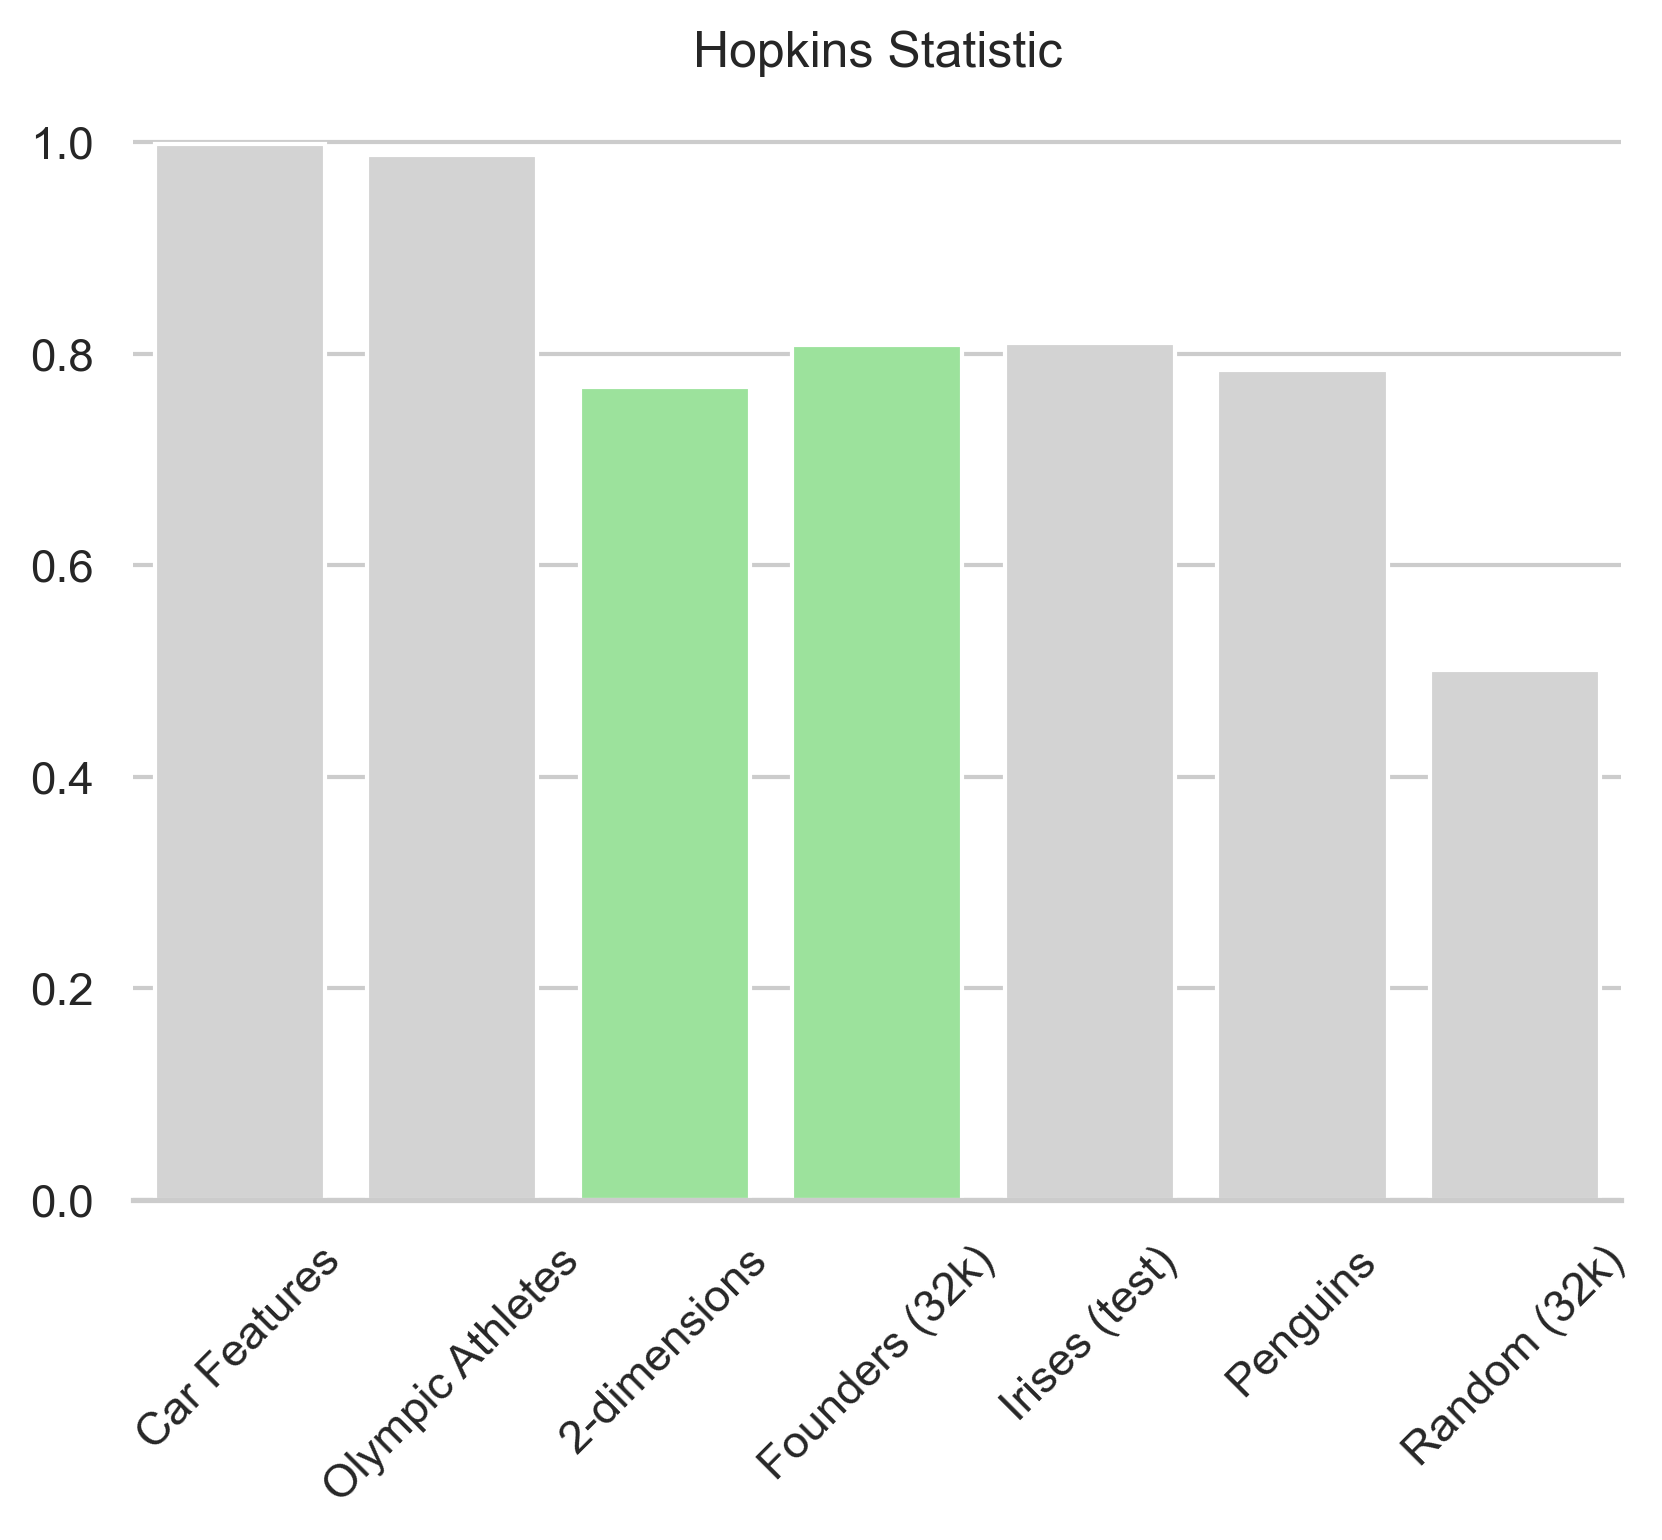

In [120]:
# Extended Data Figure 6
sns.set_style("whitegrid")
cols = ['lightgreen' if (x == '2-dimensions') or (x == 'Founders (32k)') else 'lightgray' for x in df_hopkins_compare['Datasets']]
ax = sns.barplot(x="Datasets", y="Hopkins Statistic", data=df_hopkins_compare, palette=cols)
ax.set(xlabel=None)
ax.set(ylabel=None)
ax.set(title = 'Hopkins Statistic')
sns.despine(left=True)

plt.xticks(rotation=45)

## Extended Data Figure 7 (Derivation of clusters)

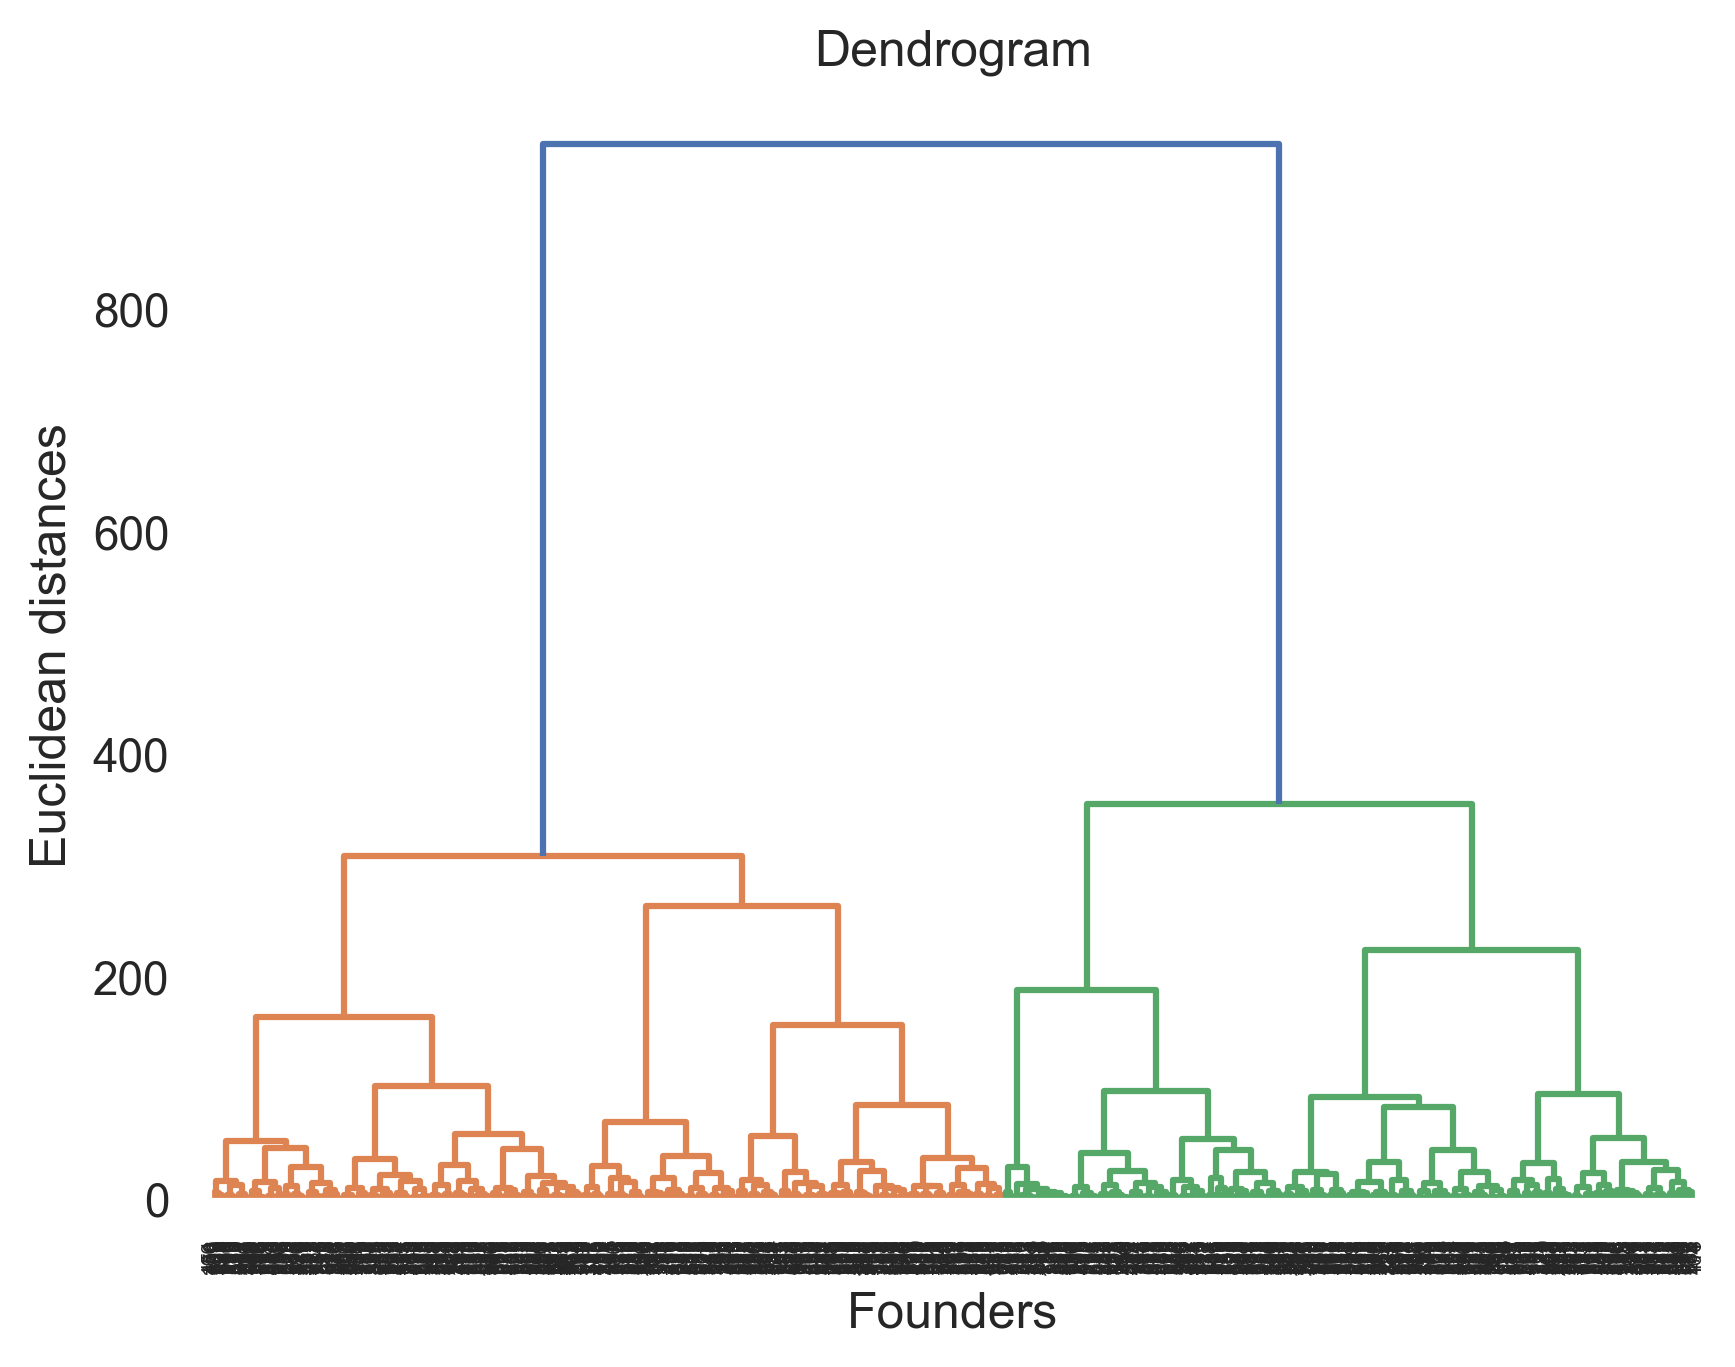

In [50]:
# Extended Data Figure 7
sns.set(font_scale = 1)
dendrogram = sch.dendrogram(sch.linkage(tsne, method  = "ward"))
plt.title('Dendrogram')
plt.xlabel('Founders')
plt.ylabel('Euclidean distances')
plt.show()

## Extended Data Figure 8 (Derivation of clusters)

In [51]:
# Extended Data Figure 8
pio.templates.default = "plotly_white"
# Create traces
fig = go.Figure()
fig.add_vline(x=6, line_width=1, line_dash="dash", line_color="grey")
fig.add_trace(go.Scatter(x=num_cluster_range, y=scale(db_score_list),
                         mode='lines', name='Davies Bouldin Index', 
                         line=dict(color='#d62728', width=2.5)))
fig.add_trace(go.Scatter(x=num_cluster_range, y=scale(sil_score_list),
                         mode='lines', name='Silhouette Coefficient',
                         line=dict(color='#1f77b4', width=2.5, dash='dash')))
fig.add_trace(go.Scatter(x=num_cluster_range, y=scale(ch_score_list), 
                         mode='lines', name='Calinski Harabas Index',
                         line=dict(color='#ff7f0e', width=2.5, dash='dashdot')))
fig.add_trace(go.Scatter(x=num_cluster_range, y=scale(dunn_score_list),
                         mode='lines', name='Dunn Index',
                         line=dict(color='#9467bd', width=2.5, dash='dot')))
fig.update_layout(
#     title='Clustering Quality VS Number of Clusters',
                  xaxis_title='Number of Clusters',
                  yaxis_title='Scaled Scores')
fig.show()

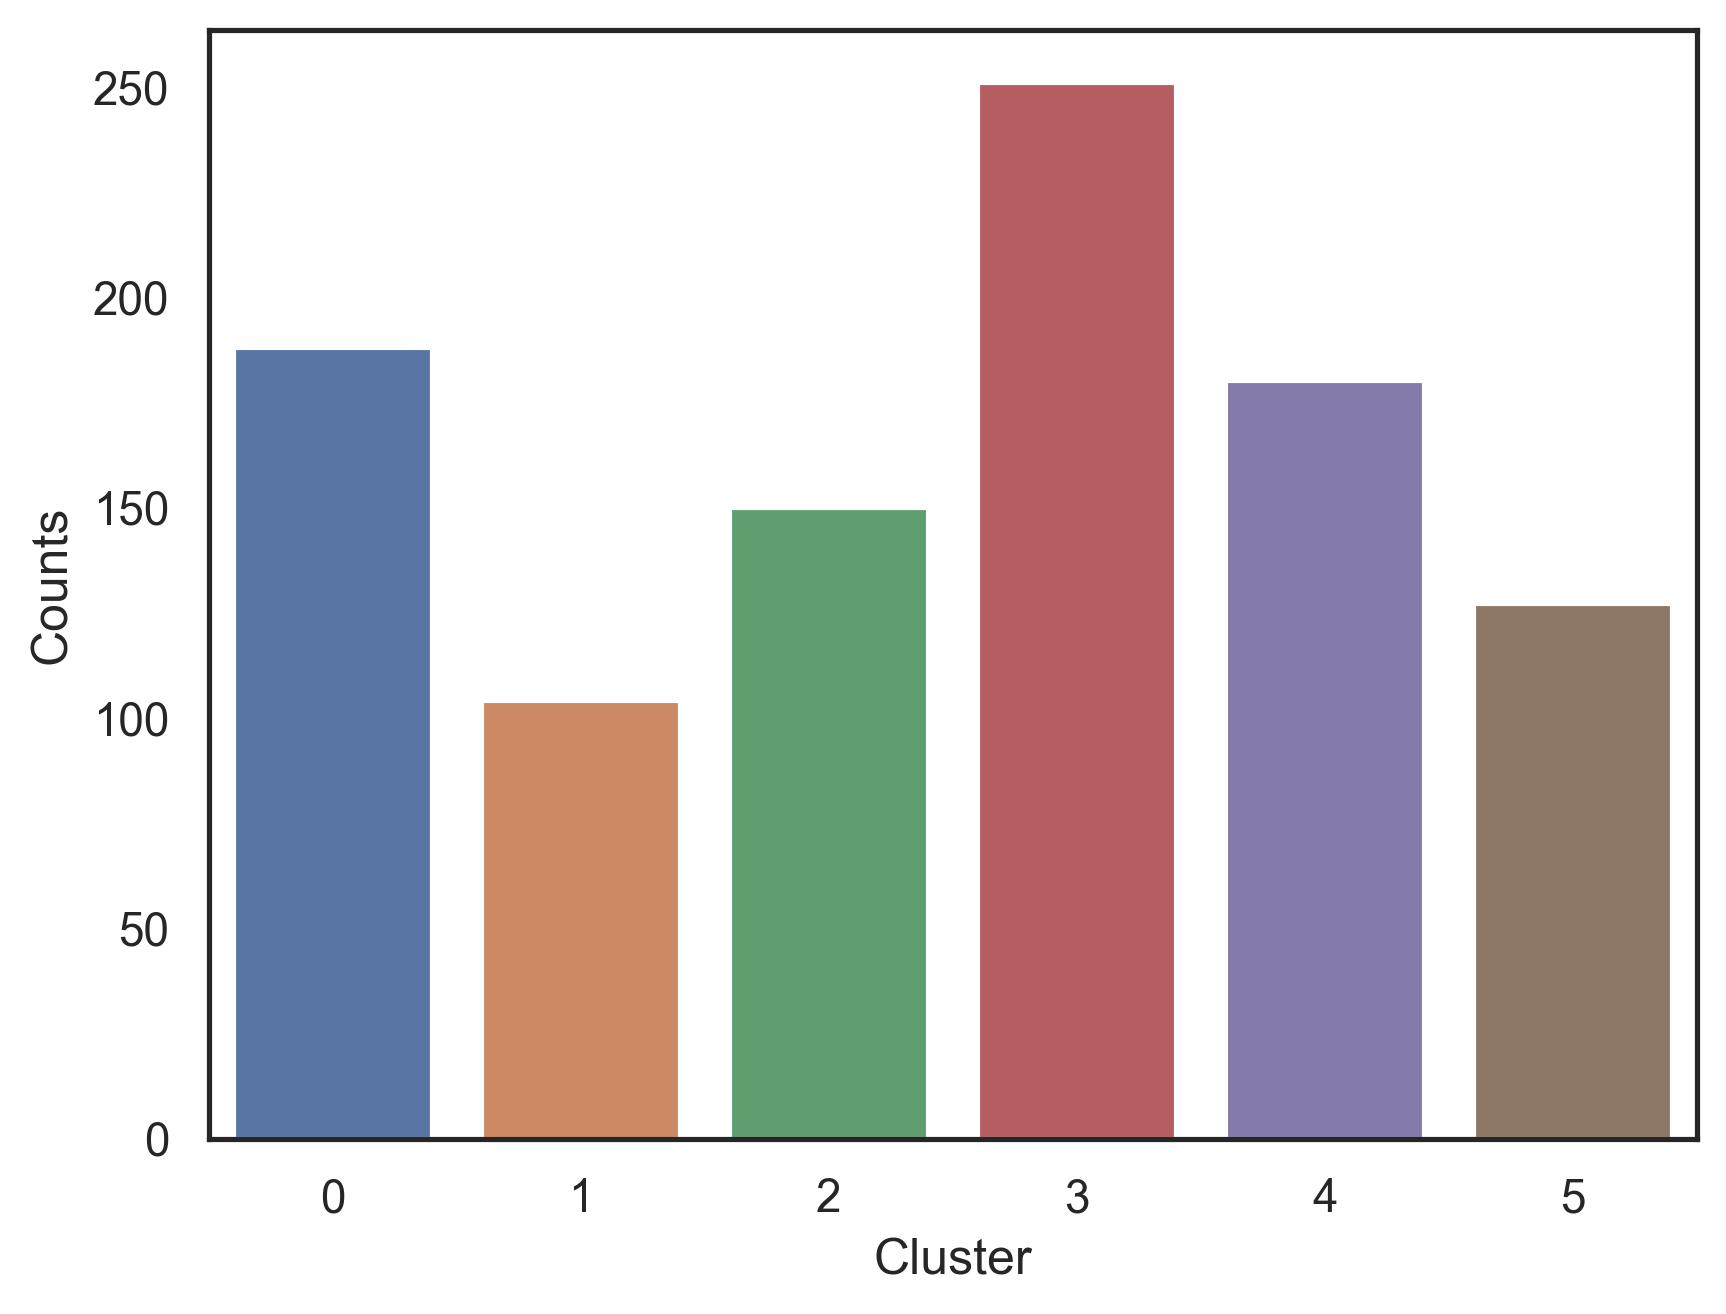

In [52]:
# Extended Data Figure 8
df_6clusters_copy = df_6clusters.copy()
df_6clusters_copy['Hierarchical_label'] = df_6clusters_copy['Hierarchical_label'].apply(lambda x: str(x).replace('1','6').replace('2','7').replace('3','8').replace('4','9').replace('5','-1').replace('9','1').replace('-1','2').replace('6','3').replace('8','4').replace('7','5'))
df_6clusters_copy['Hierarchical_label'] = df_6clusters_copy['Hierarchical_label'].astype(int)
df_counts = pd.DataFrame(df_6clusters_copy['Hierarchical_label'].value_counts())
df_counts = df_counts.reset_index()
df_counts.columns = ['Cluster','Counts']
df_counts['Cluster'] = df_counts['Cluster'].apply(lambda x: str(int(x)))

sns.set_theme(style="white")
ax = sns.barplot(x="Cluster", y="Counts", data=df_counts.sort_values('Cluster'))

## Extended Data Figure 19 (Ensemble Model)

In [18]:
## This dataset is a very small subset of the original dataset due to privacy reasons

df_model_v1 = pd.read_csv("ExtendedDataFigure19_Subset.csv")

In [19]:
col_name = df_model_v1.columns.values[1:87]
fmla = "success ~ {0}".format(' + '.join(col_name))

In [20]:
# Run the statistical model
model_v1 = sm.formula.glm(fmla,
                          family=sm.families.Binomial(), data=df_model_v1).fit()
print(model_v1.summary())

# Organize the results as a table
results_as_html = model_v1.summary().tables[1].as_html()
df_results = pd.read_html(results_as_html, header=0, index_col=0)[0]
df_results_plot = df_results[df_results['P>|z|']<0.05].sort_values('coef')
df_results_plot.rename(columns = {'P>|z|':'p-value'}, inplace = True)
df_results_plot = df_results_plot.reset_index()
df_results_plot
df_results_plot['Factors'] = np.nan
df_results_plot.loc[df_results_plot['index'].str.contains('ind_'),'Factors'] = 'Industry'
df_results_plot.loc[df_results_plot['index'].str.contains('combo'),'Factors'] = 'Combination'
df_results_plot.loc[df_results_plot['index'].str.contains('big5_'),'Factors'] = 'big5'
df_results_plot.loc[df_results_plot['index'].str.contains('facet_'),'Factors'] = 'Facets'
df_results_plot['Factors'] = df_results_plot['Factors'].fillna('Others')
# df_results_plot['Error'] = df_results_plot['std err'].apply(lambda x: 2*x)
df_results_plot = pd.concat([df_results_plot[df_results_plot['Factors'] == 'big5'],
                             df_results_plot[df_results_plot['Factors'] == 'Facets'],
                             df_results_plot[df_results_plot['Factors'] == 'Combination'],
                             df_results_plot[df_results_plot['Factors'] == 'Industry'],
                             df_results_plot[df_results_plot['Factors'] == 'Others']])


C:\Users\schoo\anaconda3\lib\site-packages\statsmodels\genmod\families\links.py:198: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)
C:\Users\schoo\anaconda3\lib\site-packages\statsmodels\genmod\families\family.py:1056: RuntimeWarning: divide by zero encountered in log
  special.gammaln(n - y + 1) + y * np.log(mu / (1 - mu + 1e-20)) +
C:\Users\schoo\anaconda3\lib\site-packages\statsmodels\genmod\families\family.py:1056: RuntimeWarning: invalid value encountered in multiply
  special.gammaln(n - y + 1) + y * np.log(mu / (1 - mu + 1e-20)) +


                 Generalized Linear Model Regression Results                  
Dep. Variable:                success   No. Observations:                 4152
Model:                            GLM   Df Residuals:                     3968
Model Family:                Binomial   Df Model:                          183
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                    nan
Date:                Thu, 14 Mar 2024   Deviance:                   1.3023e+05
Time:                        12:18:57   Pearson chi2:                 6.37e+18
No. Iterations:                   100   Pseudo R-squ. (CS):                nan
Covariance Type:            nonrobust                                         
                                                              coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------

### Comment:

We realise that the following figure looks different from the one in the paper. This is because we subset 11% of the original dataset to preserve anonymity. The data was subset in a way that left only 2 or more companies with the same characteristics in terms of startup country, startup number of founders, whether the startup had a female founder, and the industry of the startup

In [14]:
## Extended Data Figure 19
color_list = [sns.color_palette("Paired").as_hex()[1], sns.color_palette("Paired").as_hex()[5], 
              sns.color_palette("Greens").as_hex()[4], 
              sns.color_palette("Paired").as_hex()[7], sns.color_palette("Paired").as_hex()[9]]

fig = px.bar(df_results_plot, opacity = 0.6,
             x="index", y="coef",template = "plotly_white", 
             color = 'Factors', color_discrete_sequence = color_list,
             width=1500, height=900).update_traces(
    error_y={
        "type": "data",
        "symmetric": True,
        'color':'grey',
        "array": df_results_plot["std err"]
    }
)

fig.update_layout(title=go.layout.Title(text="Coefficient Estimates of Startups Success Model <br><sup>Specification: Success ~ Basics + Country + Personal level + Multi-Founder + Industry + Personality Combo</sup>", 
                                        font=dict(
                                            size=24,
                                            color="#000000")))
fig.update_yaxes(title=None)
fig.update_xaxes(title=None, tickangle=-45, tickfont=dict(color='black', size=14))
fig.update_layout(
    margin=dict(r=2, b=50, pad=20)
)
# fig.update_layout(yaxis_visible=False)

NameError: name 'df_results_plot' is not defined